In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [227]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [28]:
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [29]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,az,v,n,f,d,t,a,w,0,...,0,0,0,1,0,0,0,0,0,0
1,2,t,b,ai,a,d,b,g,y,0,...,0,0,1,0,0,0,0,0,0,0
2,3,az,v,as,f,d,a,j,j,0,...,0,0,0,1,0,0,0,0,0,0
3,4,az,l,n,f,d,z,l,n,0,...,0,0,0,1,0,0,0,0,0,0
4,5,w,s,as,c,d,y,i,m,0,...,1,0,0,0,0,0,0,0,0,0


In [30]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [31]:
print("Shape of train dataset is {} and shape of test dataset is {}".format(train_df.shape,test_df.shape))

Shape of train dataset is (4209, 378) and shape of test dataset is (4209, 377)


In [32]:
statstrain = train_df.describe()
statstrain.head()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


# If for any column(s), the variance is equal to zero, then you need to remove those variable(s).

In [86]:
def var_zero_cols(df):
    var_df=pd.DataFrame(df.var(),columns=['Variance'])
    return(list(var_df[var_df.Variance==0].index))

In [87]:
var_zero_cols(train_df)

['X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [88]:
var_merc = pd.DataFrame(train_df.var(), columns=['Variance'])
var_merc.head()

,Variance
ID,5.941936e+06
y,1.607667e+02
X10,1.313092e-02
X11,0.000000e+00
X12,6.945713e-02


In [89]:
train_df.drop(columns=list(var_merc[var_merc.Variance==0].index),inplace=True)
train_df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [90]:
train_df.shape #12 variables with zero variance have been dropped

(4209, 366)

# Check for null and unique values for test and train sets.

In [39]:
train_null_df = pd.DataFrame(train_df.isnull().any(),columns=['IsNull'])
train_null_df[train_null_df.IsNull]==True

,IsNull


#### No Null values found in train dataset

In [40]:
test_null_df = pd.DataFrame(test_df.isnull().any(),columns=['IsNull'])
test_null_df[test_null_df.IsNull]==True

,IsNull


#### No null values found in test dataset

### Checking Number of Unique values in Test and Train datasets

In [41]:
train_unique_df = pd.DataFrame(train_df.nunique(),columns=['UniqueCount'])
train_unique_df[train_unique_df.UniqueCount>10]

,UniqueCount
ID,4209
y,2545
X0,47
X1,27
X2,44
X5,29
X6,12
X8,25


In [42]:
test_unique_df = pd.DataFrame(test_df.nunique(),columns=['UniqueCount'])
test_unique_df[test_unique_df.UniqueCount>10]

,UniqueCount
ID,4209
X0,49
X1,27
X2,45
X5,32
X6,12
X8,25


In [84]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4208 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.2+ MB


In [94]:
train_df.select_dtypes(include="object").columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

# Here there are 8 categorical variable with datatype as object. Analyzing those variables from X0 to X8

### Analyzing XO 

In [76]:
train_df.X0.value_counts()

z     360
ak    349
y     324
ay    313
t     306
x     300
o     269
f     227
n     195
w     182
j     181
az    175
aj    151
s     106
ap    103
h      75
d      73
al     67
v      36
af     35
ai     34
m      34
e      32
ba     27
at     25
a      21
ax     19
i      18
am     18
aq     18
u      17
l      16
aw     16
ad     14
k      11
b      11
au     11
r      10
as     10
bc      6
ao      4
c       3
aa      2
q       2
ac      1
ab      1
g       1
Name: X0, dtype: int64

<AxesSubplot:xlabel='X0', ylabel='y'>

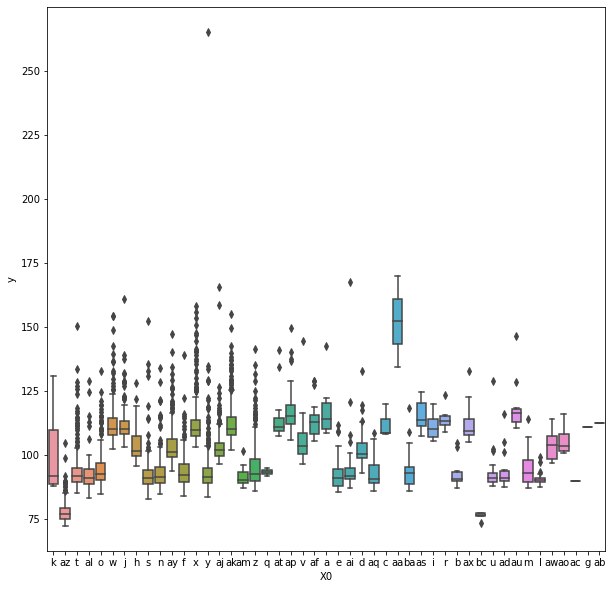

In [77]:
plt.figure(figsize=(10,10))
sns.boxplot(x=train_df.X0,y=train_df.y)

In [91]:
train_df.shape

(4209, 366)

In [92]:
train_df.drop(labels=((train_df[train_df.X0=='y']['y']).sort_values(ascending=False))[:1].index.values,inplace=True)

In [93]:
train_df.shape #dropped extreme outlier observations

(4208, 366)

### Analyzing X1

In [102]:
train_df.X1.value_counts()

aa    833
s     598
b     592
l     590
v     408
r     250
i     203
a     143
c     121
o      82
w      52
z      46
u      37
e      33
m      32
t      31
h      29
y      23
f      23
j      22
n      19
k      17
p       9
g       6
ab      3
q       3
d       3
Name: X1, dtype: int64

<AxesSubplot:xlabel='X1', ylabel='y'>

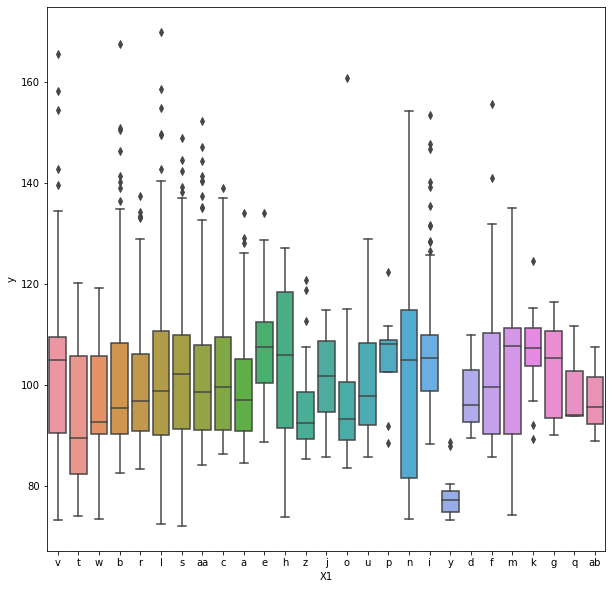

In [103]:
plt.figure(figsize=(10,10))
sns.boxplot(x=train_df.X1,y=train_df.y)

### Analyzing X2

In [104]:
train_df.X2.value_counts()

as    1659
ae     496
ai     414
m      367
ak     265
r      153
n      137
s       94
f       87
e       81
aq      63
ay      54
a       47
t       29
i       25
k       25
b       21
ao      20
z       19
ag      19
d       18
ac      13
g       12
ap      11
y       11
x       10
aw       8
h        6
at       6
an       5
q        5
al       5
ah       4
p        4
av       4
au       3
ar       1
j        1
o        1
c        1
am       1
af       1
aa       1
l        1
Name: X2, dtype: int64

<AxesSubplot:xlabel='X2', ylabel='y'>

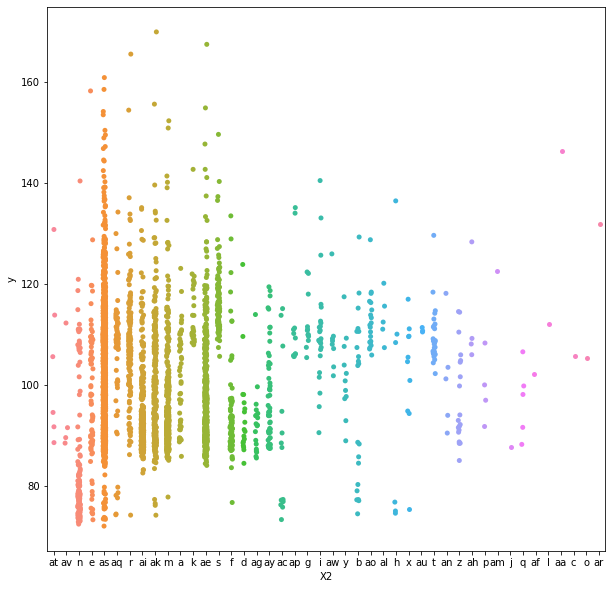

In [106]:
plt.figure(figsize=(10,10))
sns.stripplot(x=train_df.X2,y=train_df.y)

### Analyzing X3

In [107]:
train_df.X3.value_counts()

c    1942
f    1075
a     440
d     290
g     241
e     163
b      57
Name: X3, dtype: int64

<AxesSubplot:xlabel='X3', ylabel='y'>

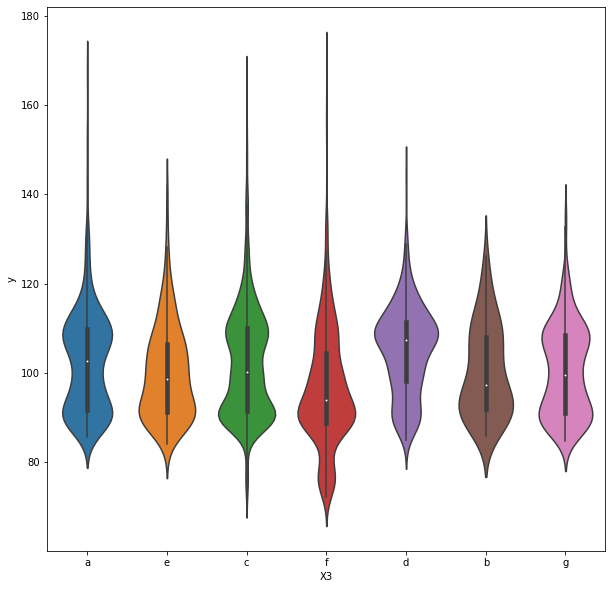

In [109]:
plt.figure(figsize=(10,10))
sns.violinplot(x=train_df.X3,y=train_df.y)

### Analyzing X4

In [110]:
train_df.X4.value_counts()

d    4204
a       2
b       1
c       1
Name: X4, dtype: int64

<AxesSubplot:xlabel='X4', ylabel='y'>

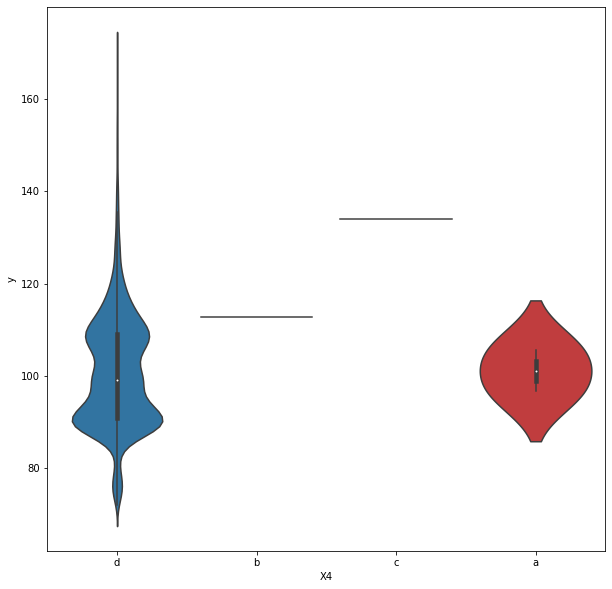

In [111]:
plt.figure(figsize=(10,10))
sns.violinplot(x=train_df.X4,y=train_df.y)

### Analyzing X5

In [112]:
train_df.X5.value_counts()

v     231
w     231
q     220
r     215
d     214
s     214
n     212
m     208
p     208
i     207
ae    205
ag    203
ac    200
ab    197
l     195
af    188
ad    185
k     177
c     131
j     125
aa    112
ah     97
o      20
f       7
x       2
h       1
u       1
y       1
g       1
Name: X5, dtype: int64

<AxesSubplot:xlabel='X5', ylabel='y'>

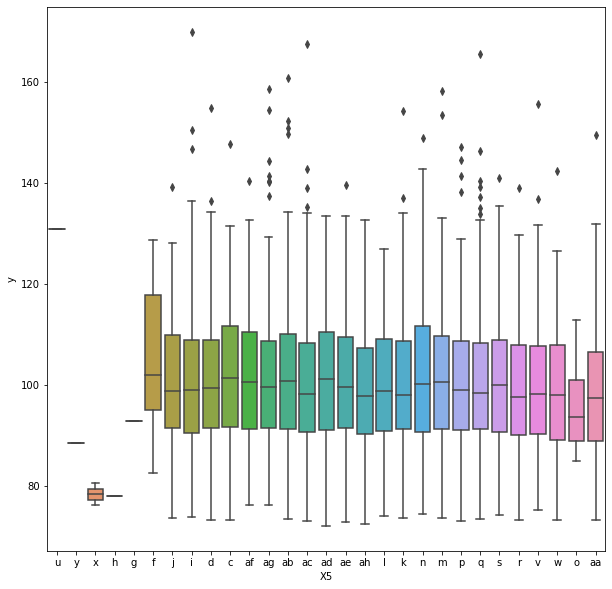

In [114]:
plt.figure(figsize=(10,10))
sns.boxplot(x=train_df.X5,y=train_df.y)

In [125]:
train_df.drop(labels=((train_df[train_df.X5=='y']['y']).sort_values(ascending=False))[:3].index.values,inplace=True)

In [127]:
train_df.shape #Dropping exterme outliers morethan 160

(4207, 366)

### Analyzing X6

In [128]:
train_df.X6.value_counts()

g    1042
j    1039
d     625
i     488
l     476
a     206
h     190
k      43
c      38
b      28
f      20
e      12
Name: X6, dtype: int64

<AxesSubplot:xlabel='X6', ylabel='y'>

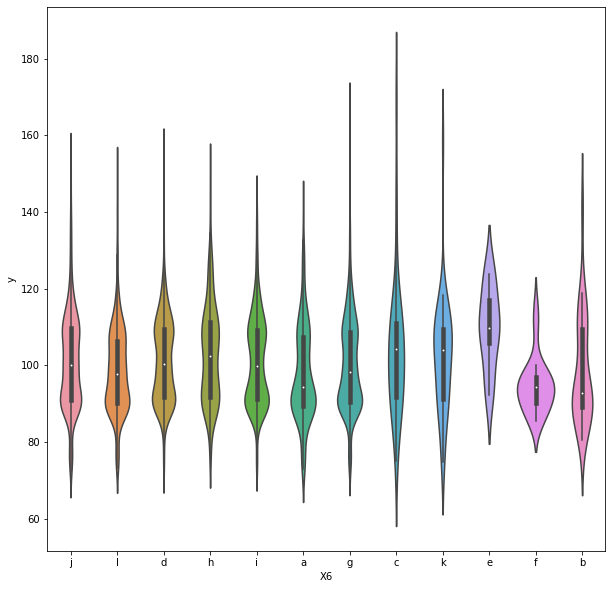

In [129]:
plt.figure(figsize=(10,10))
sns.violinplot(x=train_df.X6,y=train_df.y)

### Analyzing X8 

In [130]:
train_df.X8.value_counts()

j    277
s    255
f    243
n    242
i    237
e    225
r    219
a    210
w    196
v    194
b    190
k    176
o    162
m    155
g    130
u    119
t    118
h    117
q    117
y    116
x    105
d    103
l    101
c    100
p    100
Name: X8, dtype: int64

<AxesSubplot:xlabel='X8', ylabel='y'>

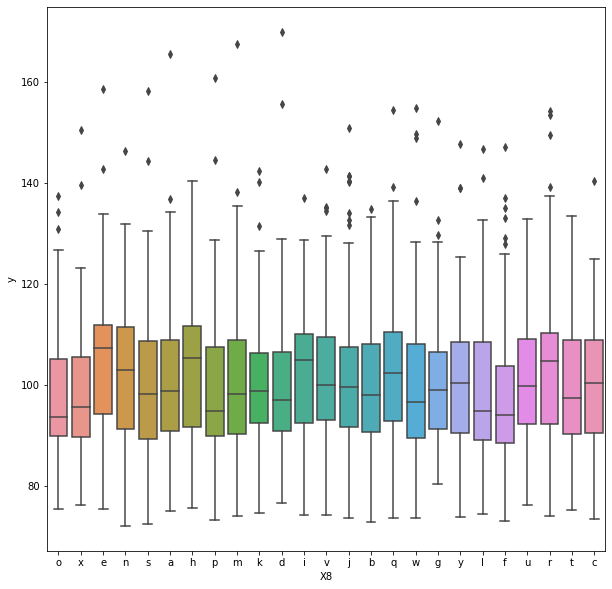

In [131]:
plt.figure(figsize=(10,10))
sns.boxplot(x=train_df.X8,y=train_df.y)

In [132]:
train_df.drop(labels=((train_df[train_df.X8=='y']['y']).sort_values(ascending=False))[:3].index.values,inplace=True)

In [133]:
train_df.shape

(4204, 366)

# Apply Label Encoder 

### Applying label encoder on categorical features to convert them to numerical 

In [206]:
from sklearn.preprocessing import LabelEncoder

In [228]:
catvariables = train_df.select_dtypes(include="object").columns
catvariables

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [229]:
x_train = train_df.drop('y',axis=1)
y_train = train_df['y']

In [230]:
def transform_labels(df,x):
    catCols=df.select_dtypes(include="object").columns
    le=LabelEncoder()
    for i in catCols:
        le.fit(x[i])
        x[i]=le.transform(x[i])

In [231]:
transform_labels(train_df,x_train)

In [234]:
x_train.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,32,23,17,0,3,24,9,14,0,...,0,0,1,0,0,0,0,0,0,0
1,6,32,21,19,4,3,28,11,14,0,...,1,0,0,0,0,0,0,0,0,0
2,7,20,24,34,2,3,27,9,23,0,...,0,0,0,0,0,0,1,0,0,0
3,9,20,21,34,5,3,27,11,4,0,...,0,0,0,0,0,0,0,0,0,0
4,13,20,23,34,5,3,12,3,13,0,...,0,0,0,0,0,0,0,0,0,0


In [235]:
def transform_labels(df):
    le=LabelEncoder()
    for i in catvariables:
        le.fit(df[i])
        df[i]=le.transform(df[i])

In [236]:
transform_labels(test_df)

In [237]:
test_df.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X8,X10,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,1,21,23,34,5,3,26,0,22,0,...,0,0,0,1,0,0,0,0,0,0
1,2,42,3,8,0,3,9,6,24,0,...,0,0,1,0,0,0,0,0,0,0
2,3,21,23,17,5,3,0,9,9,0,...,0,0,0,1,0,0,0,0,0,0
3,4,21,13,34,5,3,31,11,13,0,...,0,0,0,1,0,0,0,0,0,0
4,5,45,20,17,2,3,30,8,12,0,...,1,0,0,0,0,0,0,0,0,0


# Perform dimensionality reduction

Just from this, we can see that our training data is made up of just 4209 rows, but has 377 seemingly anonymised features inside. As well as this, we are given an ID (which is not equal to the row number, this could be significant) and the target value, which is the number of seconds taken.

min: 72.11 max: 265.32 mean: 100.66931812782121 std: 12.679381281524675
Count of values above 180: 1


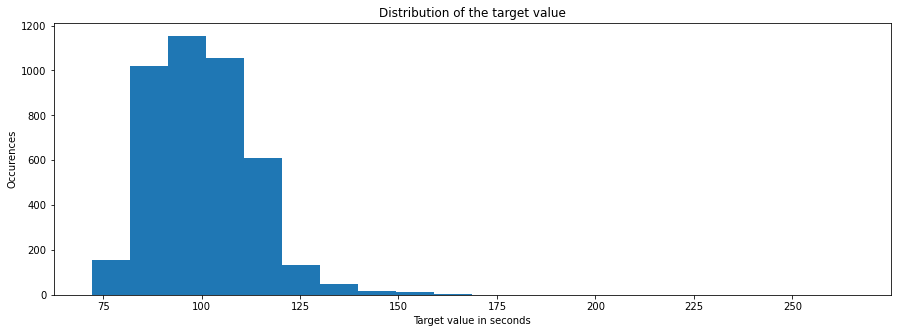

In [186]:
plt.figure(figsize=(15, 5))
plt.hist(y_train, bins=20)
plt.xlabel('Target value in seconds')
plt.ylabel('Occurences')
plt.title('Distribution of the target value')

print('min: {} max: {} mean: {} std: {}'.format(min(y_train), max(y_train), y_train.mean(), y_train.std()))
print('Count of values above 180: {}'.format(np.sum(y_train > 200)))

### Checking cardinality of features

In [189]:
cols = [c for c in train_df.columns if 'X' in c]
counts = [[], [], []]
for c in cols:
    typ = train_df[c].dtype
    uniq = len(np.unique(train_df[c]))
    if uniq == 1: counts[0].append(c)
    elif uniq == 2 and typ == np.int64: counts[1].append(c)
    else: counts[2].append(c)

print('Constant features: {} Binary features: {} Categorical features: {}\n'.format(*[len(c) for c in counts]))

print('Constant features:', counts[0])
print('Categorical features:', counts[2])

Constant features: 12 Binary features: 356 Categorical features: 8

Constant features: ['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
Categorical features: ['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']


Interestingly, we have 12 features which only have a single value in them - these are pretty useless for supervised algorithms, and should probably be dropped

In [195]:
df_train = train_df.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347'],axis=1)

In [196]:
df_train.shape

(4209, 366)

In [197]:
df_train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


# Predict your test_df values using XGBoost

In [142]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [238]:
usable_columns = list(set(df_train.columns) - set(['ID', 'y']))

In [240]:
x_test = test_df[usable_columns]

In [249]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=4242)

d_train = xgb.DMatrix(x_train, label=y_train)
d_valid = xgb.DMatrix(x_valid, label=y_valid)
d_test = xgb.DMatrix(x_test)

params = {}
params['objective'] = 'reg:linear'
params['eta'] = 0.02
params['max_depth'] = 4

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

watchlist = [(d_train, 'train'), (d_valid, 'valid')]

clf = xgb.train(params, d_train, 1000, watchlist, early_stopping_rounds=50, feval=xgb_r2_score, maximize=True, verbose_eval=10)

ImportError: cannot import name 'xgb' from 'sklearn.preprocessing' (C:\Users\Sujay.Krishna\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)